In [1]:
# Main library: https://square.github.io/pysurvival/index.html
#----------------------------Reproducible------------------------------------------
import numpy as np
import random as rn
import pandas as pd
import gc
import os

seed=0
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
rn.seed(seed)

#----------------------------Reproducible------------------------------------------

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from sklearn.model_selection import train_test_split
from pysurvival.models.semi_parametric import NonLinearCoxPHModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score
from pysurvival.utils.display import display_loss_values
from pysurvival.utils.display import compare_to_actual

from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt

import heapq
import seaborn as sns

In [2]:
def csv_read(p_path):
    pd_data=pd.read_csv(p_path, sep=',',header=None)
    column_names=pd_data.columns.values.tolist()
    return np.array(pd_data),column_names

def csv_read_with_header(p_path):
    pd_data=pd.read_csv(p_path, sep=',')
    column_names=pd_data.columns.values.tolist()
    return np.array(pd_data),np.array(column_names)

def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

In [3]:
used_number_features=10

file_name_1=25
file_name_2=3

path1='./'+str(file_name_1)+'/feature_selection.csv'
path2='./'+str(file_name_2)+'/feature_selection.csv'

data1_,_=csv_read(path1)
data1=data1_[-1,0:used_number_features]
data2_,_=csv_read(path2)
data2=data2_[-1,0:used_number_features]

In [4]:
selected_features_all=set(data1).union(set(data2))
selected_features_common=set(data1).intersection(set(data2))

print("selected_features_all",selected_features_all)
print("selected_features_common",selected_features_common)

selected_features_all {'NACCCOGF', 'NPFTDT5', 'RACE', 'HOMEHOBB', 'NACCAGEB', 'NACCREAS', 'NACCIDEM', 'ALCDEM', 'NACCVASC', 'IMPNOMCI', 'NACCAGE', 'NACCDAGE', 'COGJUDG', 'JUDGMENT', 'COMMUN', 'COGMODE'}
selected_features_common {'NACCAGEB', 'NACCAGE', 'NACCIDEM', 'NACCDAGE'}


In [5]:
inputdata1,column_names1=csv_read_with_header('./'+str(file_name_1)+'/data/survival_data_filtered_3.csv')
inputdata2,column_names2=csv_read_with_header('./'+str(file_name_2)+'/data/survival_data_filtered_3.csv')

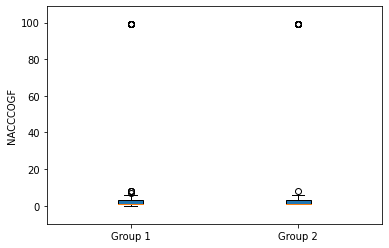

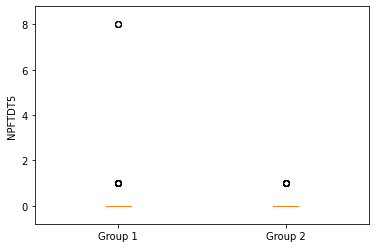

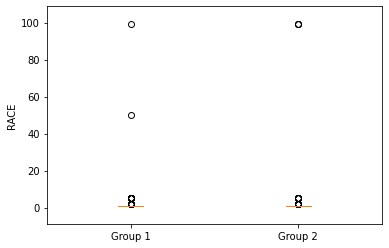

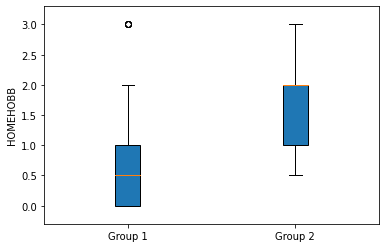

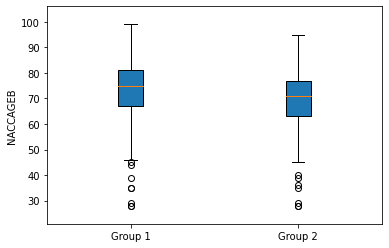

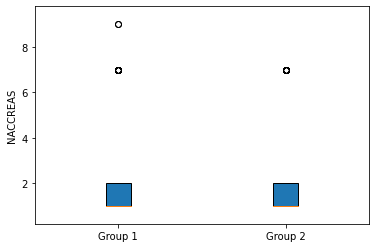

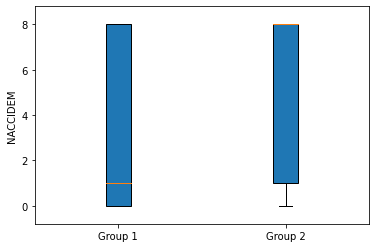

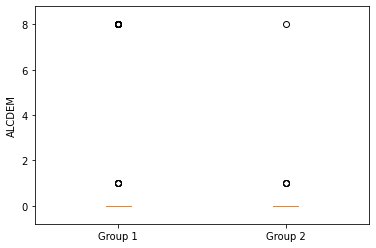

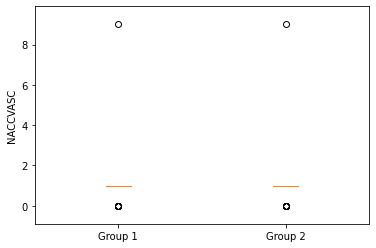

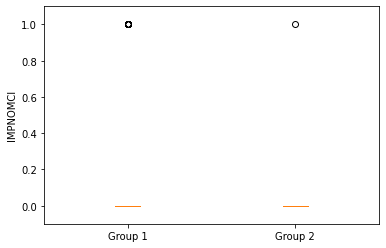

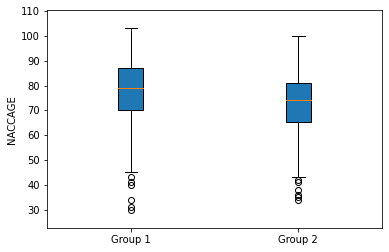

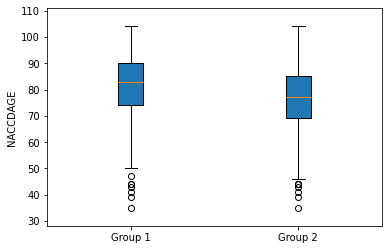

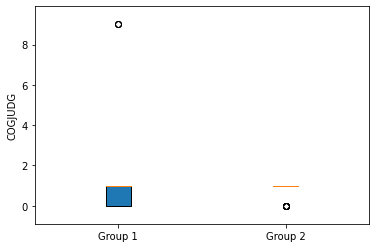

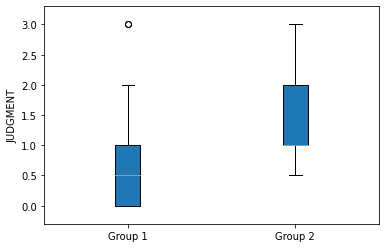

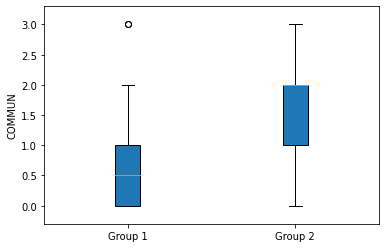

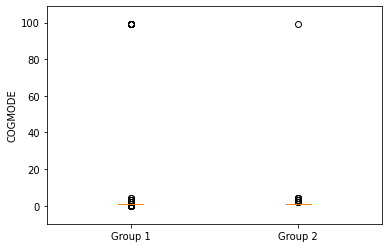

In [6]:
selected_features_all_list=list(selected_features_all)

for i in np.arange(len(selected_features_all_list)):
    index1_i=np.where(column_names1==selected_features_all_list[i])[0][0]
    index2_i=np.where(column_names2==selected_features_all_list[i])[0][0]

    group1=inputdata1[:,index1_i]
    group2=inputdata2[:,index2_i]
    y_label=selected_features_all_list[i]

    bar_figure(group1,group2,y_label)